In [1]:
Pr_Positive_Vampire <- 0.95 
Pr_Positive_Moral <- 0.01
Pr_Vampire <- 0.001
Pr_Positive <- Pr_Positive_Vampire * Pr_Vampire + Pr_Positive_Moral * (1 - Pr_Vampire)
(Pr_Vampire_Positive <- Pr_Positive_Vampire * Pr_Vampire / Pr_Positive)

[1] 0.08683729

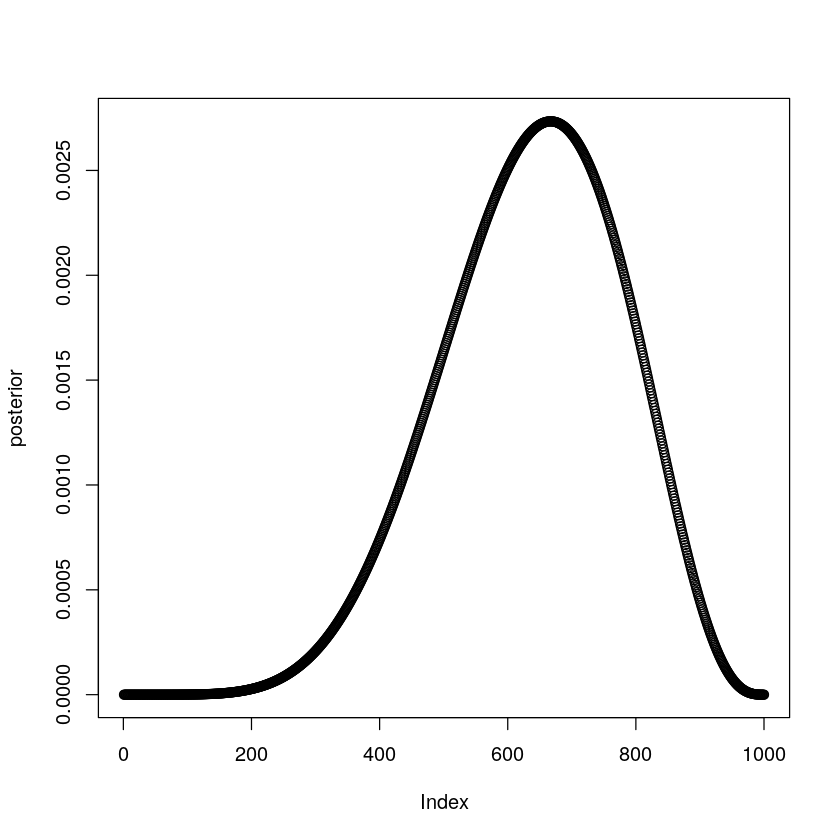

In [2]:
p_grid <- seq(from=0, to=1, length.out=1000)
prob_p <- rep(1, 1000)
prob_data <- dbinom(6, size=9, prob=p_grid)
posterior <- prob_data * prob_p
posterior <- posterior / sum(posterior)
plot(posterior)

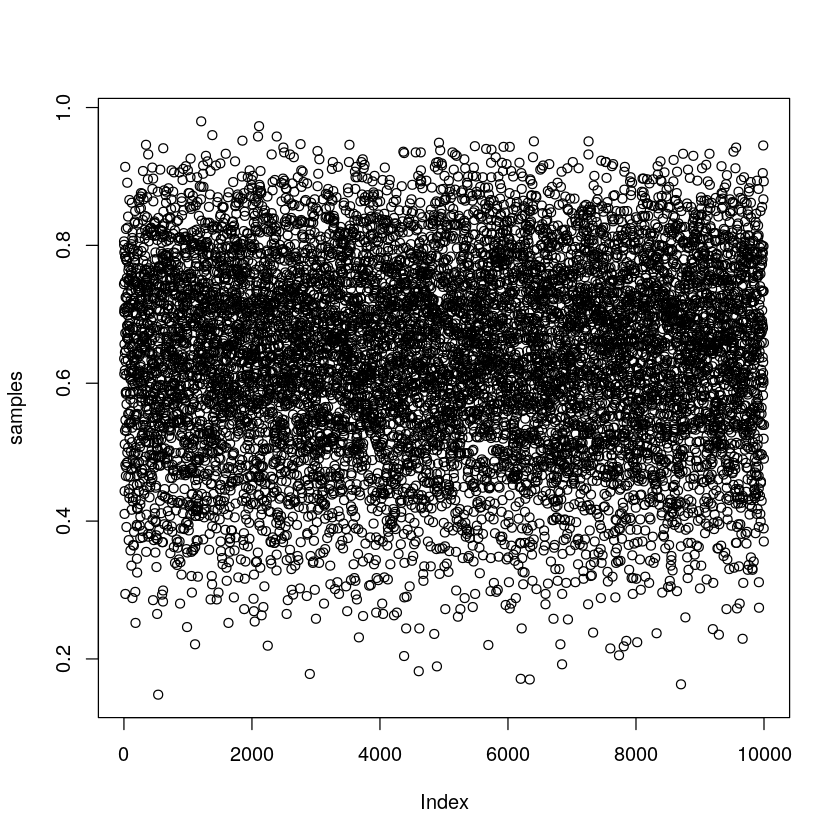

In [3]:
samples = sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
plot(samples)

In [132]:
library("rethinking")

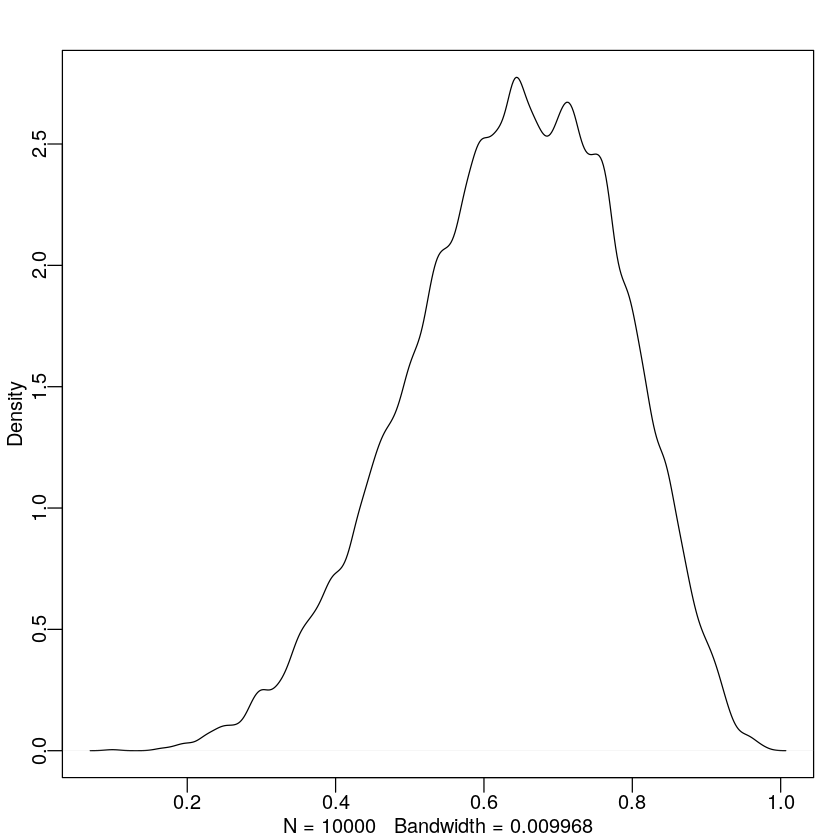

In [14]:
dens(samples)

In [16]:
sum(posterior[p_grid < 0.5])

[1] 0.1718746

In [21]:
sum(samples < 0.5) / 1e4

[1] 0.1721

In [30]:
quantile(samples, 0.8)

80% 
0.7617618

In [27]:
quantile(samples, c(0.1, 0.9))

10%       90% 
0.4473473 0.8118118

In [40]:
p_grid <- seq(from=0, to=1, length.out=1000)
prior <- rep(1, 1000)
likelihood <- dbinom(3, size=3, prob=p_grid)
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
samples <- sample(p_grid, size=1e4, replace=TRUE, prob=posterior)


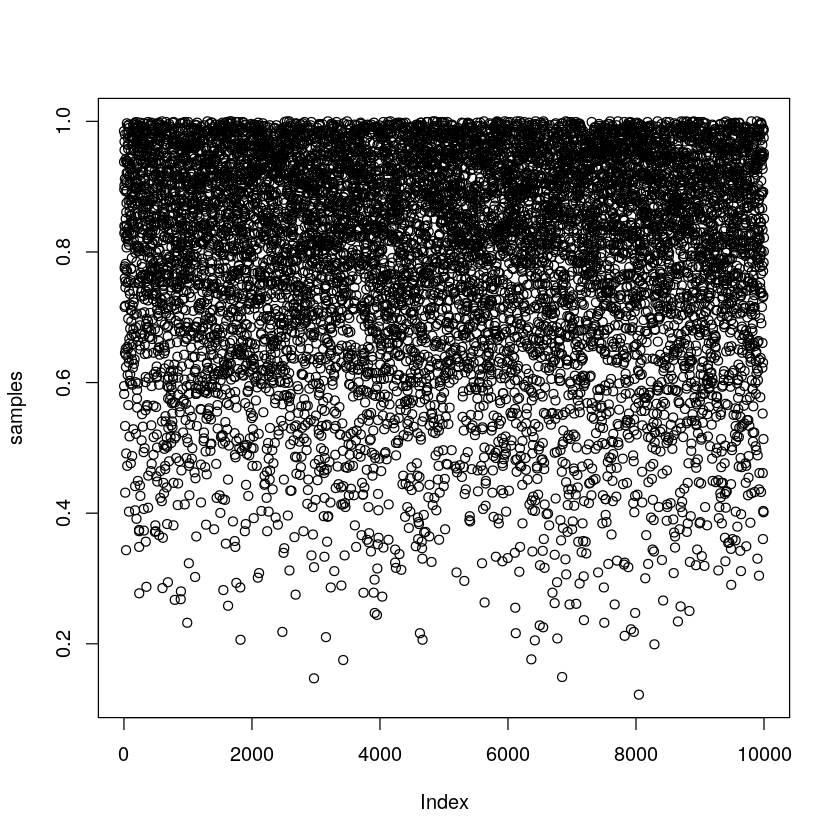

In [41]:
plot(samples) 

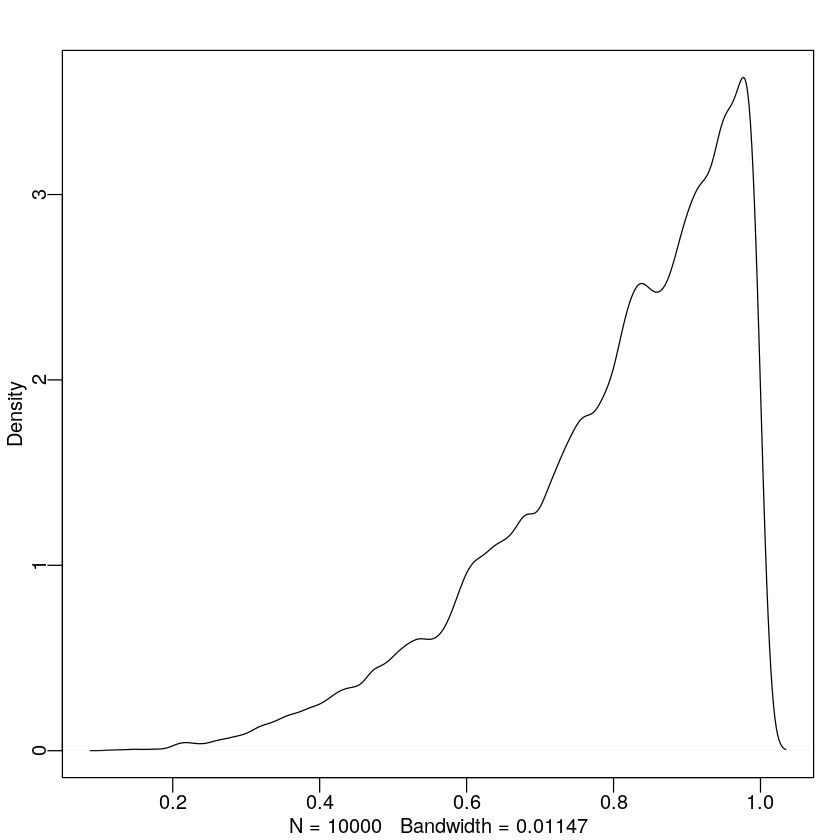

In [42]:
dens(samples)

In [43]:
PI(samples, prob=0.5)

25%       75% 
0.7077077 0.9299299

In [44]:
HPDI(samples, prob=0.5)

|0.5      0.5| 
0.8368368 0.9989990

# 3.2.3 Point Estimates

In [50]:
p_grid[which.max(posterior)] # MAP

[1] 1

In [52]:
estimate = 0.5
sum(posterior * abs(estimate - p_grid))

[1] 0.3128752

In [54]:
loss <- sapply(p_grid, function(d) sum(posterior * abs(d - p_grid)))
p_grid[which.min(loss)]

[1] 0.8408408

In [55]:
median(samples)

[1] 0.8378378

# 3.3: Sampling to Simulate Prediction

In [57]:
dbinom(0:2, size=2, prob=0.7)

[1] 0.09 0.42 0.49

In [62]:
rbinom(10, size=2, prob=0.7)

[1] 2 0 2 1 2 2 0 2 1 2

In [63]:
dummy_w <- rbinom(1e5, size=2, prob=0.7)
table(dummy_w) / 1e5

dummy_w
      0       1       2 
0.09114 0.41879 0.49007 

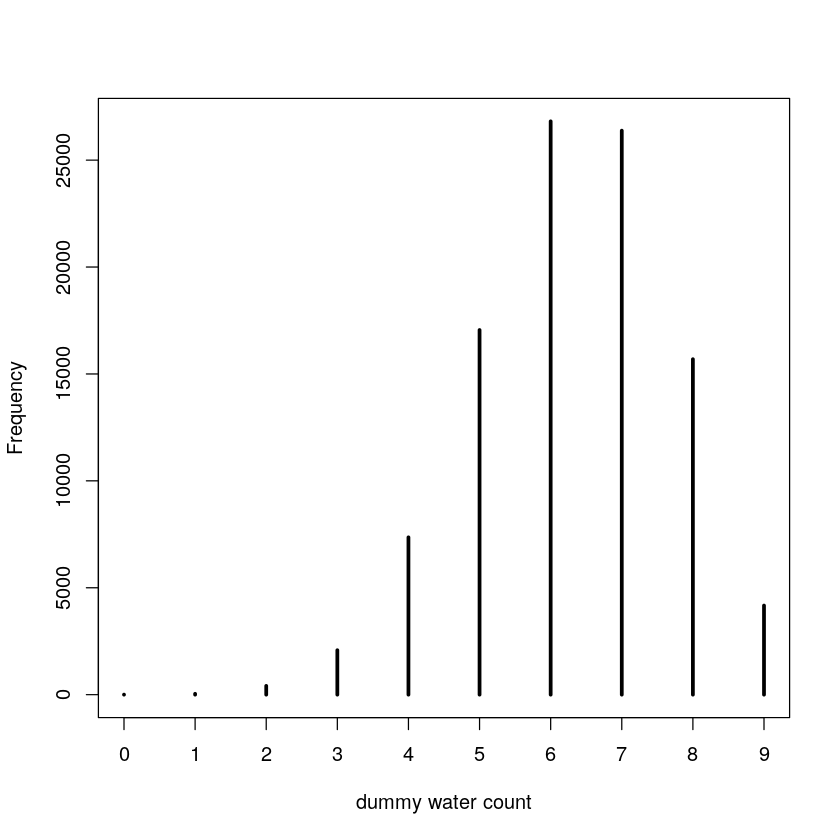

In [64]:
dummy_w <- rbinom(1e5, size=9, prob=0.7)
simplehist(dummy_w, xlab="dummy water count")

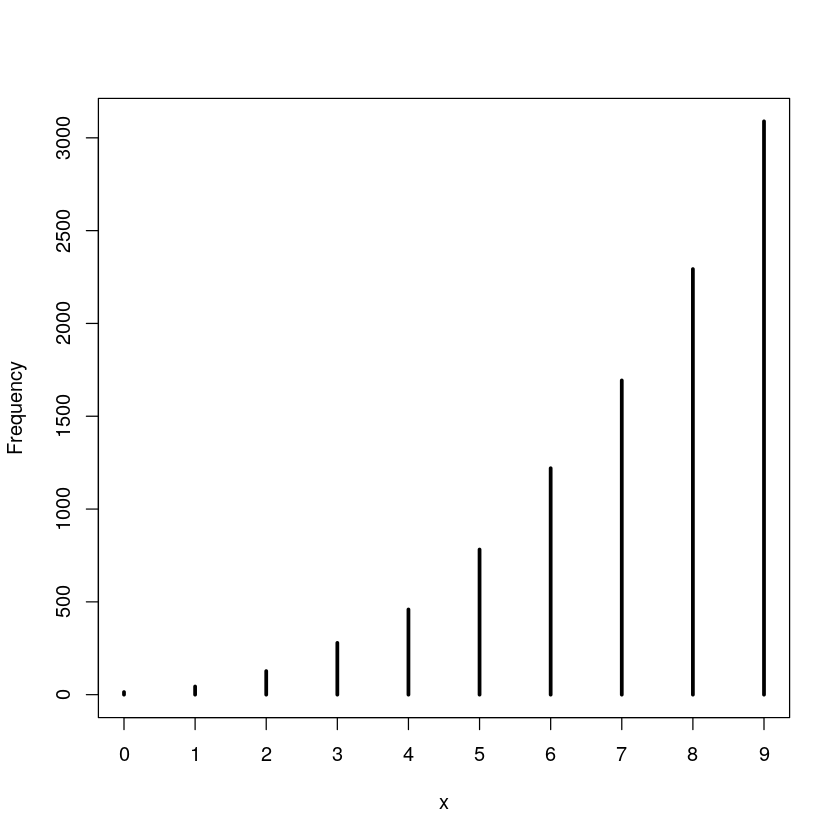

In [69]:
w <- rbinom(1e4, size=9, prob=samples)
simplehist(w)

# exercises

In [5]:
# dummy data
p_grid <- seq( from=0 , to=1 , length.out=1000 )
prior <- rep( 1 , 1000 )
likelihood <- dbinom( 6 , size=9 , prob=p_grid )
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
set.seed(100)
samples <- sample( p_grid , prob=posterior , size=1e4 , replace=TRUE )

In [6]:
quantile(samples, 0.2)

20% 
0.5185185

In [7]:
# 3E1
sum(samples < 0.2) / 1e4

[1] 4e-04

In [8]:
# 3E2
sum(samples < 0.8) / 1e4

[1] 0.8884

In [9]:
# 3E3
sum(samples < 0.8 & samples > 0.2) / 1e4

[1] 0.888

In [47]:
# 3E4 - 20% of the posterior probability lies below what value of p?
x = list()
for (i in p_grid) {
    if (abs(sum(samples < i) / length(samples) - 0.2) < 1e-3) {
        x[length(x) + 1] <- i
    }
}
x

[[1]]
[1] 0.5185185

In [48]:
# 3E5 - 20% of the posterior probability lies above what value of p? 
x = list()
for (i in p_grid) {
    if (abs(sum(samples > i) / 1e4 - 0.2) < 1e-3) {
        x <- append(x, i)
    }
}
x

[[1]]
[1] 0.7557558

In [136]:
# 3E6
HPDI(samples, prob=0.66)

|0.66     0.66| 
0.5085085 0.7737738

In [138]:
# 3E7
PI(samples, prob=0.66)

17%       83% 
0.5025025 0.7697698

In [139]:
# 3M1
likelihood <- dbinom( 8 , size=15 , prob=p_grid )
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
set.seed(100)
samples <- sample( p_grid , prob=posterior , size=1e4 , replace=TRUE )

In [42]:
# 3M2
HPDI(samples, prob=0.9)

|0.9      0.9| 
0.4144144 0.8638639

In [99]:
# 3M3 Construct a posterior predictive check for this model and data. This means simulate the distribution 
# of samples, averaging over the posterior uncertainty in p. What is the probability of 
# observing 8 water in 15 tosses?
dummy_3M3 <- rbinom(1e4, size=15, prob=samples)
length(dummy_3M3[dummy_3M3 == 8]) / 1e4

[1] 0.1137

In [100]:
# 3M4
dummy_3M4 <- rbinom(1e4, size=9, prob=samples)
length(dummy_3M4[dummy_3M4 == 6]) / 1e4

[1] 0.2016

In [102]:
# 3M5 - 3M2
prior <- ifelse(p_grid < 0.5, 0, 1)
likelihood <- dbinom( 6 , size=9 , prob=p_grid )
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
set.seed(100)
samples <- sample( p_grid , prob=posterior , size=1e4 , replace=TRUE )

HPDI(samples, prob=0.9)

|0.9      0.9| 
0.5005005 0.8208208

In [103]:
# 3M5 - 3M3
dummy_3M5_3M3 <- rbinom(1e4, size=15, prob=samples)
length(dummy_3M5_3M3[dummy_3M5_3M3 == 8]) / 1e4

[1] 0.1038

In [104]:
# 3M5 - 3M4
dummy_3M5_3M3 <- rbinom(1e4, size=9, prob=samples)
length(dummy_3M5_3M3[dummy_3M5_3M3 == 6]) / 1e4

[1] 0.22

In [158]:
# 3M6 Suppose you want to estimate the Earth’s proportion of water very precisely. Specifically, you
# want the 99% percentile interval of the posterior distribution of p to be only 0.05 wide. This means
# the distance between the upper and lower bound of the interval should be 0.05. How many times will
# you have to toss the globe to do this?


In [130]:
data(homeworkch3)

In [150]:
# 3H1
N <- length(c(birth1, birth2))
p_grid <- seq(from=0 , to=1 , length.out=10 * N)
prior <- rep(1 , 10 * N)
likelihood <- dbinom(sum(birth1) + sum(birth2), size=N, prob=p_grid)
posterior <- likelihood * prior
posterior <- posterior # / sum(posterior)
set.seed(100)
samples <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
samples[which.max(samples)]

[1] 0.6963482

In [151]:
# 3H2
samples2 <- sample(samples, size=1e4, replace=TRUE)
samples2[which.max(samples2)]

[1] 0.6958479

In [152]:
HPDI(samples2, prob=0.5)

|0.5      0.5| 
0.5322661 0.5787894

In [153]:
HPDI(samples2, prob=0.89)

|0.89     0.89| 
0.4967484 0.6053027

In [154]:
HPDI(samples2, prob=0.97)

|0.97     0.97| 
0.4772386 0.6258129

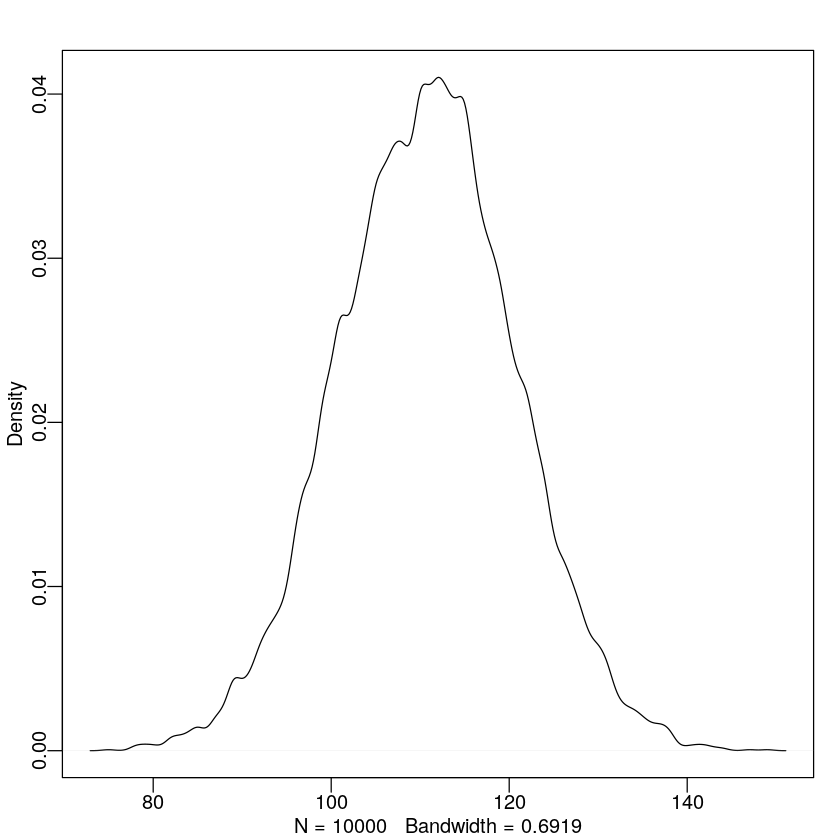

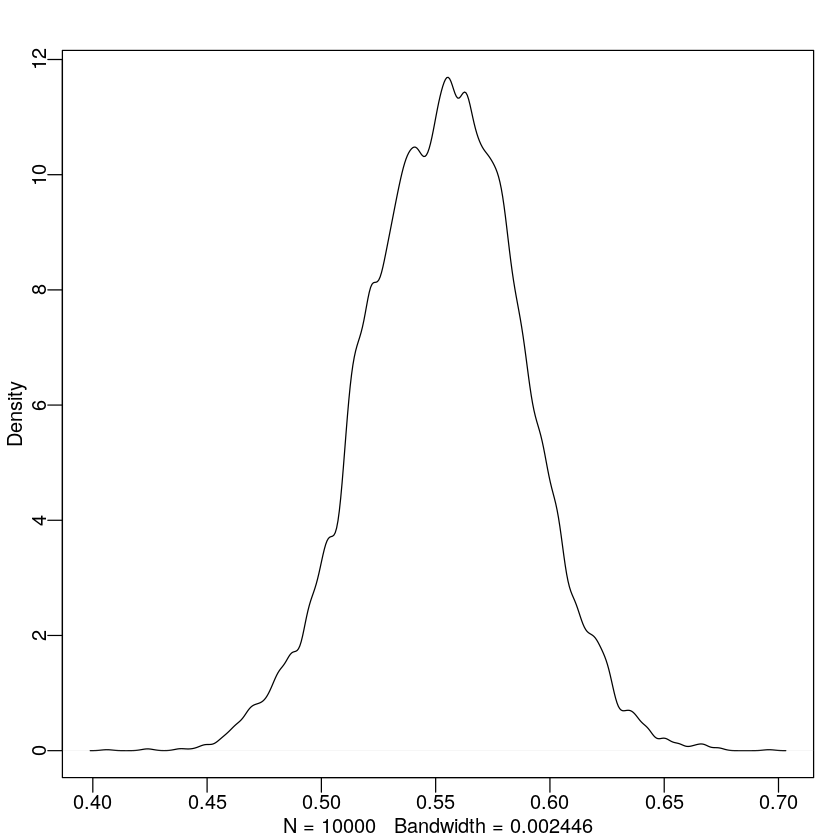

In [157]:
# 3H3
boys <- rbinom(1e4, size=N, prob=samples)
dens(boys)